In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [6]:
# load data 

df = pd.read_csv("117 01Students.csv")
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [8]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [56]:
# Check Missing Data 
df.isna()

,Hours,Marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [13]:
a = df['Hours'].values.reshape(-1,1)
b = df['Marks']

In [14]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3, random_state=42)

In [16]:
a_train.shape

(21, 1)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
c_hat= lr.predict(a_test)
c_hat

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [27]:
b_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

In [45]:
lr.score(a_test,b_test)

0.8538655334937386

In [47]:
lr.score(a_train,b_train)

0.8111744903394345

In [41]:
from sklearn.metrics import mean_squared_error

In [44]:
np.sqrt(mean_squared_error(a_test, c_hat))

61.73096844123752

In [50]:
lr.predict([[4.50]])

array([57.4494523])

In [52]:
lr.predict([[15]])

array([110.1339571])

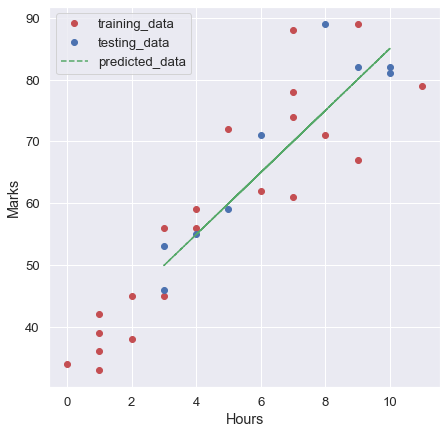

In [54]:
plt.plot(a_train, b_train, 'ro', label='training_data')
plt.plot(a_test, b_test, 'bo', label='testing_data')
plt.plot(a_test, c_hat, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()

In [59]:
#Data scaling 

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df = ms.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])

In [58]:
import warnings 
warnings.filterwarnings("ignore")

In [61]:
scaled_df

,x1,x2
0,0.000000,0.017857
1,0.090909,0.053571
2,0.090909,0.000000
3,0.090909,0.107143
4,0.090909,0.160714
5,0.181818,0.214286
6,0.181818,0.089286
7,0.272727,0.214286
8,0.272727,0.357143
9,0.272727,0.232143
